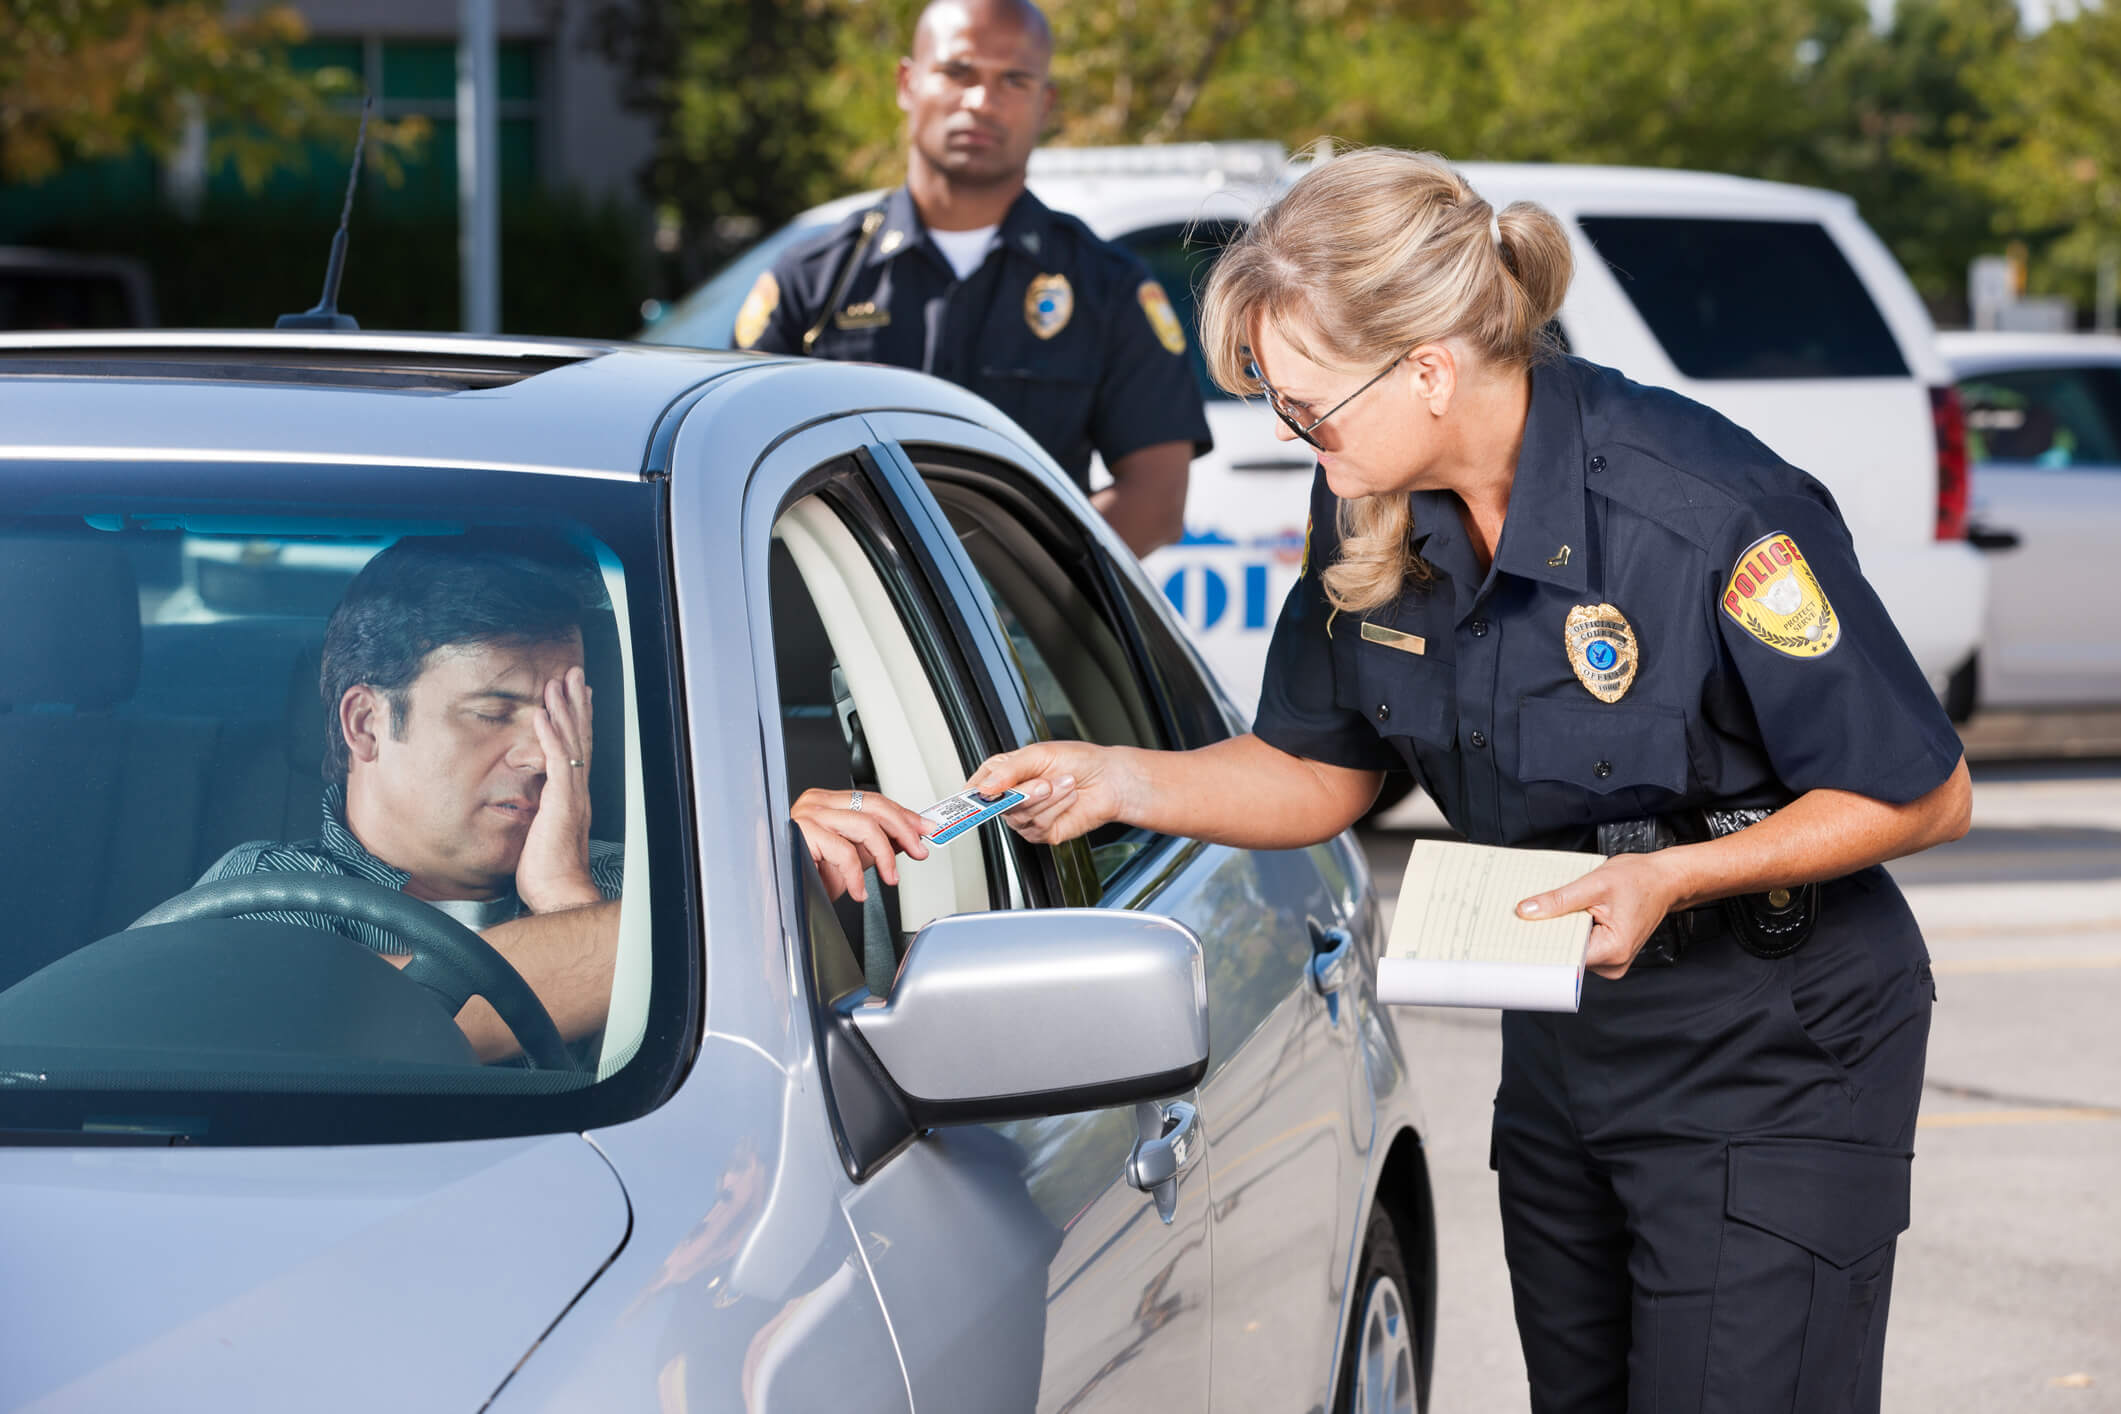
<font color=red size=4>We will explore the multiple topics and questions with dataset containng drivers' information and violation types.<font>

In [2]:
#Importing the necessary packages for this EDA

In [3]:
import pandas as pd
import matplotlib as plt
import pylab as pl

In [4]:
#Importing csv file to pandas data frame and checking out dataset

In [5]:
vio=pd.read_csv("traffic_violaions.csv")
vio.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
vio.shape

(52966, 15)

In [7]:
vio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [8]:
#Checking out how many races existed in the dataset
vio.loc[:,"driver_race"].unique()

array(['White', 'Black', 'Asian', nan, 'Hispanic', 'Other'], dtype=object)

In [9]:
#Checking out how many durations of stop existed in the dataset
vio.loc[:,"stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [10]:
#Checking out how many stop outcomes existed in the dataset
vio.loc[:,"stop_outcome"].unique()

array(['Citation', 'Arrest Driver', nan, 'N/D', 'Warning',
       'Arrest Passenger', 'No Action'], dtype=object)

<font color=black size=2> Topic.1 Violation types and stop outcomes overview <font>
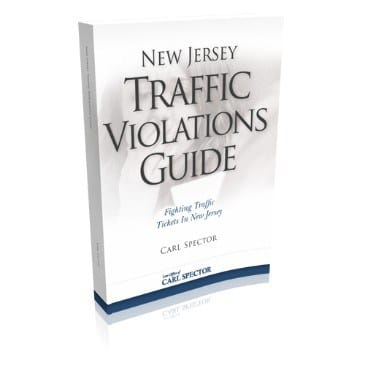

Text(0.5, 0.98, 'Violation types statistics')

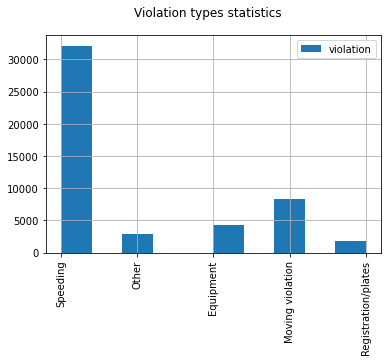

In [11]:
types=vio.loc[:,"violation"]
types.hist(xrot=90,legend=True)
pl.suptitle("Violation types statistics")

Text(0.5, 0.98, 'Stop outcome types statistics')

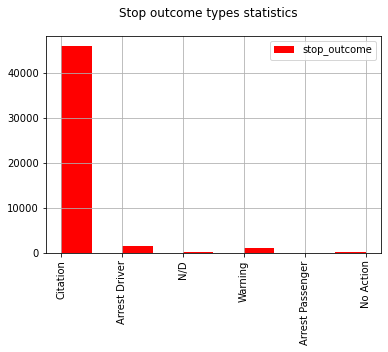

In [13]:
outcome=vio.loc[:,"stop_outcome"]
outcome.hist(xrot=90,legend=True,color="red")
pl.suptitle("Stop outcome types statistics")

Conclusion:
Speeding is the most common traffic violation, while citation is the most common stop outcome.

 <font color=black size=2>Topic.2 Traffic violations and races <font>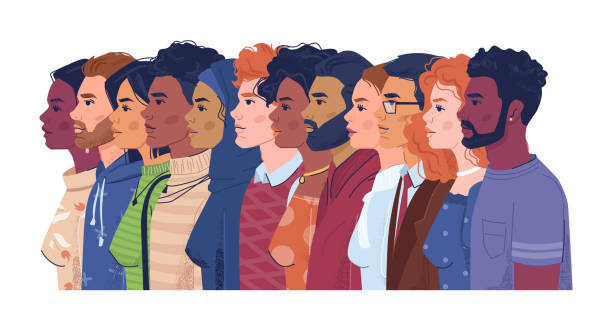

In [14]:
#Slicing the dataframe to get the information we need
vio_race=vio.loc[:,["violation","driver_race"]]

In [15]:
#Showing stop duration and traffic violations in number
vio_race.groupby(['driver_race','violation']).size()

driver_race  violation          
Asian        Equipment                 92
             Moving violation         162
             Other                     62
             Registration/plates       25
             Speeding                1034
Black        Equipment                857
             Moving violation        1530
             Other                    654
             Registration/plates      428
             Speeding                3125
Hispanic     Equipment                652
             Moving violation        1013
             Other                    382
             Registration/plates      358
             Speeding                1694
Other        Equipment                  7
             Moving violation          33
             Other                     19
             Registration/plates        1
             Speeding                  89
White        Equipment               2668
             Moving violation        5647
             Other                   1844
 

Text(0.5, 1.0, 'Race and taffic violations')

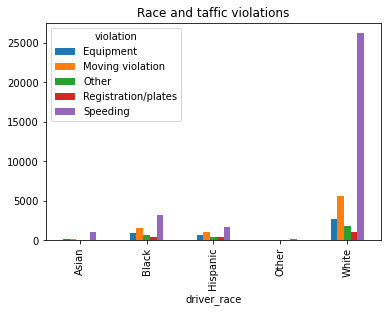

In [16]:
#Showing races and traffic violations in bar chart 
pd.pivot_table(vio_race,index = 'driver_race',columns = 'violation',aggfunc ='size').plot(kind='bar')
pl.title("Race and taffic violations")

In [17]:
#Slicing the dataframe to get the information we need
vio_duration=vio.loc[:,["violation","stop_duration"]]

In [19]:
#Showing stop duration and traffic violations in number
vio_duration.groupby(['violation','stop_duration']).size()

violation            stop_duration
Equipment            0-15 Min          3102
                     16-30 Min          900
                     30+ Min            274
Moving violation     0-15 Min          5311
                     16-30 Min         2105
                     30+ Min            969
Other                0-15 Min          1661
                     16-30 Min          858
                     30+ Min            442
Registration/plates  0-15 Min          1017
                     16-30 Min          638
                     30+ Min            165
Speeding             0-15 Min         26342
                     16-30 Min         5344
                     30+ Min            453
dtype: int64

Text(0.5, 1.0, 'Stop duration and taffic violations')

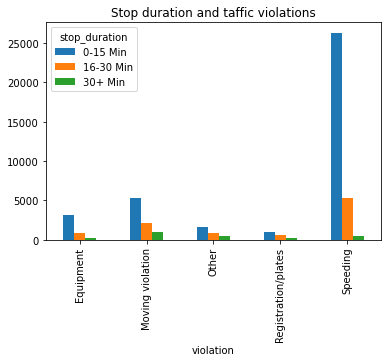

In [21]:
#Showing stop durations and traffic violations in bar chart 
pd.pivot_table(vio_duration,index = 'violation',columns = 'stop_duration',aggfunc ='size').plot(kind='bar')
pl.title("Stop duration and taffic violations")

Text(0.5, 1.0, 'Arrested or not and driver race')

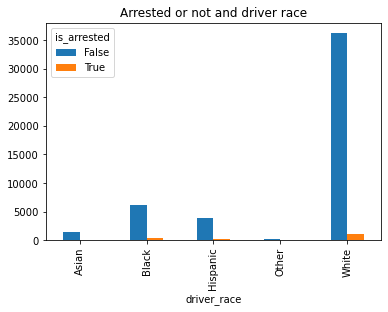

In [23]:
race_arrest=vio.loc[:,["driver_race","is_arrested"]]
pd.pivot_table(race_arrest,index = 'driver_race',columns = 'is_arrested',aggfunc ='size').plot(kind='bar')
pl.title("Arrested or not and driver race")

Text(0.5, 1.0, 'drugs related stop or not and driver race')

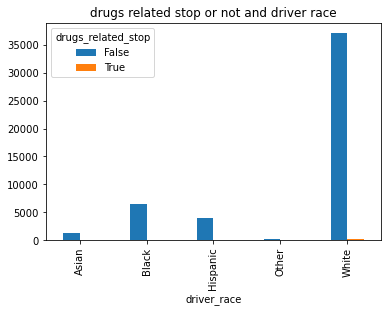

In [29]:
race_drug_related=vio.loc[:,["driver_race","drugs_related_stop"]]
pd.pivot_table(race_drug_related,index = 'driver_race',columns = 'drugs_related_stop',aggfunc ='size').plot(kind='bar')
pl.title("drugs related stop or not and driver race")

Conclusion:  
1.Speeding is always the main traffic violations for all the drivers regardless races.  
2.No matter the types of traffic violations, stop durations usually last within 15 mins.  
3.The whites face the most drug related stops and arrests in number.

 <font color=black size=2>Topic.3 Traffic violations and genders <font>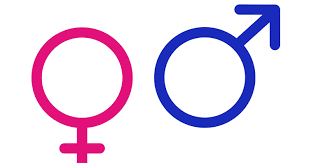

In [53]:
vio_gender=vio.loc[:,["violation","driver_gender"]]
vio_gender.groupby(["driver_gender","violation"]).size()

driver_gender  violation          
F              Equipment                855
               Moving violation        1390
               Other                    354
               Registration/plates      504
               Speeding                9913
M              Equipment               3421
               Moving violation        6995
               Other                   2607
               Registration/plates     1316
               Speeding               22225
dtype: int64

Text(0.5, 1.0, 'driver genders and traffic violations')

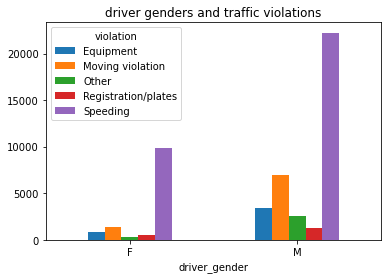

In [55]:
pd.pivot_table(vio_gender,index="driver_gender",columns="violation",aggfunc="size").plot(kind="bar",rot=360)
pl.title("driver genders and traffic violations")

Text(0.5, 1.0, 'driver gender and traffic stop arrests')

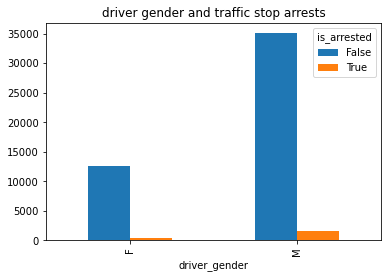

In [57]:
gender_arrest=vio.loc[:,["driver_gender","is_arrested"]]
pd.pivot_table(gender_arrest,index="driver_gender",columns="is_arrested",aggfunc="size").plot(kind="bar")
pl.title("driver gender and traffic stop arrests")

Text(0.5, 1.0, 'Drugs related stop and gender')

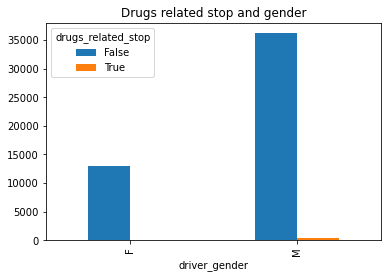

In [59]:
gender_drug_related_stop=vio.loc[:,["driver_gender","drugs_related_stop"]]
pd.pivot_table(gender_drug_related_stop,index="driver_gender",columns="drugs_related_stop",aggfunc="size").plot(kind="bar")
pl.title("Drugs related stop and gender")

Conclusions:  
1.Male drivers violated the more speeding than female in number.  
2.Male drivers faced more arrests during traffic stops.  
3.Male drivers faced more drugs related stops than female.